# Get Data



In [12]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/confirmed17june.csv?token=ALQ7JJR6UATO6GRNYVO6Z4266W42Q'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/deceased17june.csv?token=ALQ7JJQXVF7UL37ZTVGAZ6K66W44C'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/recovered17june.csv?token=ALQ7JJXTMGDY2IIBJGW5TPC66W46C'
recover = pd.read_csv(url, error_bad_lines=False)

## Population

In [13]:
population=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/population.csv?token=ALQ7JJQXYR2IIRLNRAAHQWC66W476', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [14]:
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,...,10-Jun-20,11-Jun-20,12-Jun-20,13-Jun-20,14-Jun-20,15-Jun-20,16-Jun-20,17-Jun-20,Population,region
0,Andaman and Nicobar Islands,India,11.667026,92.735983,0,0,0,0,0,0,...,35,38,38,38,40,41,44,44,"380,581",India_Andaman and Nicobar Islands
1,Andhra Pradesh,India,14.750429,78.570026,1,1,1,1,1,3,...,5247,5429,5636,5858,6152,6456,6720,7071,"49,506,799",India_Andhra Pradesh
2,Arunachal Pradesh,India,27.100399,93.616601,0,0,0,0,0,0,...,61,67,86,91,94,98,102,106,"1,383,727",India_Arunachal Pradesh
3,Assam,India,26.244156,92.537842,0,0,0,0,0,0,...,3286,3431,3694,3901,4119,4310,4511,4695,"31,205,576",India_Assam
4,Bihar,India,25.785414,87.479973,0,0,0,0,0,0,...,5698,5948,6096,6289,6475,6662,6810,6940,"104,099,452",India_Bihar
5,Chandigarh,India,30.719997,76.780006,0,0,0,0,0,1,...,328,332,345,350,352,357,365,370,"1,055,450",India_Chandigarh
6,Chattisgarh,India,21.295132,81.828232,0,0,0,0,0,1,...,1262,1398,1445,1550,1671,1715,1784,1864,"25,545,198",India_Chattisgarh
7,Dadra and Nagar Haveli,India,20.266578,73.016618,0,0,0,0,0,0,...,29,30,30,35,39,39,54,59,"453,229",India_Dadra and Nagar Haveli
8,Daman and Diu,India,20.428300,72.839700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"326,097",India_Daman and Diu
9,Delhi,India,28.669993,77.230004,7,7,7,8,10,14,...,32810,34687,36824,38958,41182,42829,44688,47102,"16,787,941",India_Delhi


## Create Time Series + Plots

In [15]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long','Population'], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [16]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)

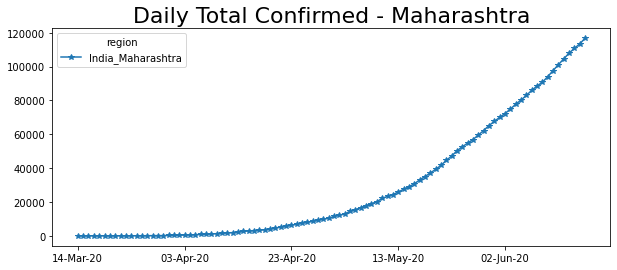

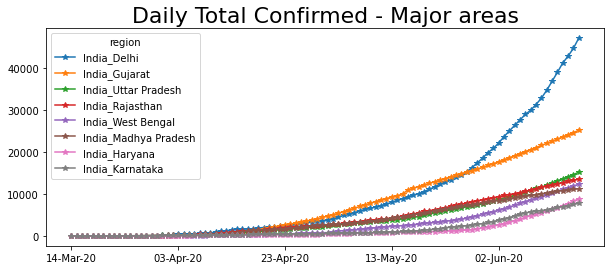

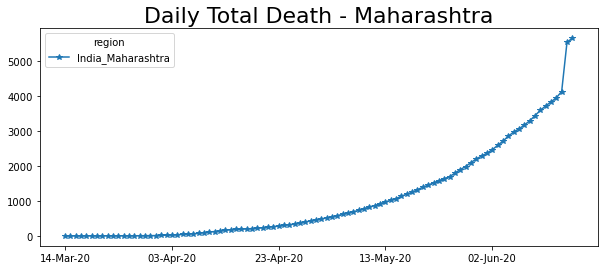

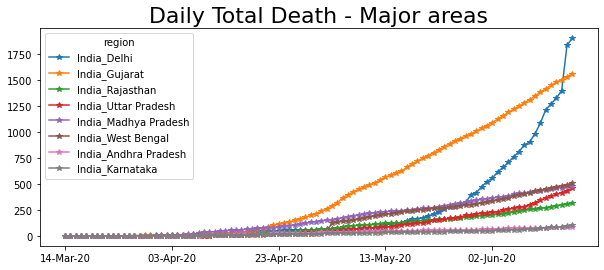

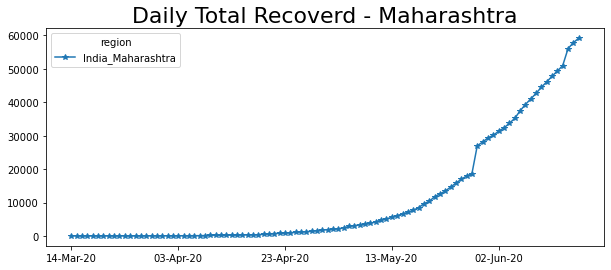

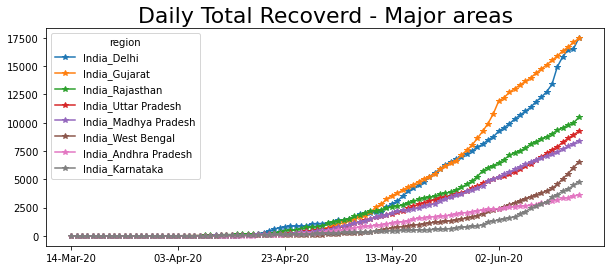

In [17]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img1.png')
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22}).figure.savefig('img2.png')

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img3.png')
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22}).figure.savefig('img4.png')

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Maharashtra',fontdict={'fontsize': 22}).figure.savefig('img5.png')
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22}).figure.savefig('img6.png')

## Kalman Filter With R


In [18]:
conda install -m rpy2

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [19]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [20]:
%%R
install.packages('pracma', repos='http://cran.us.r-project.org')
install.packages('reshape', repos='http://cran.us.r-project.org')
install.packages('readr', repos='http://cran.us.r-project.org')

In [21]:
# Above cell will take some time(Be patient!!!)
# Place above code in a new cell if 'UsageError: Line magic function `%%R` not found' is thrown

In [23]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/ts_C17.csv?token=ALQ7JJR735PWMBRTMSMS7T266W5TC")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
p.set_index(temp.index,inplace=True)
#temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

In [28]:
w=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/w_history17.csv?token=ALQ7JJX4V3C47MXIITL2M4266W5XU', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'])
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/w_forecast17.csv?token=ALQ7JJUDKRLRC5V2K2XZYVS66W7JG', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'])

## Build Train Set Data Structure

In [29]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [30]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region','Population']],how='left',on='region')
train=train.rename(columns = {'Population':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
train['infected_rate'] =train['last_day']/train['population']*10000
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


## Kalman 1 day Prediction with Evaluation

In [42]:
# # removing csv files from working directory

# import os 

# for file in os.scandir('../working/'):
#     if file.name.endswith(".csv"):
#         os.unlink(file.path)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

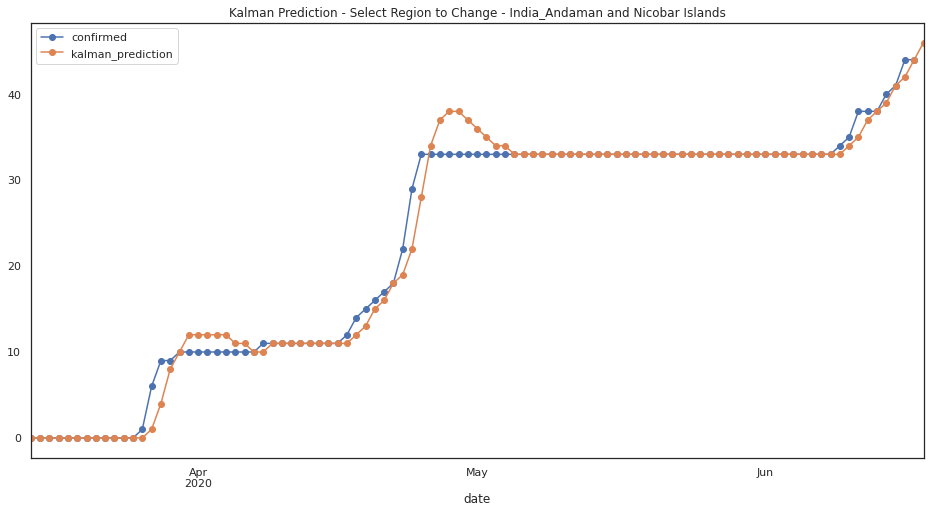

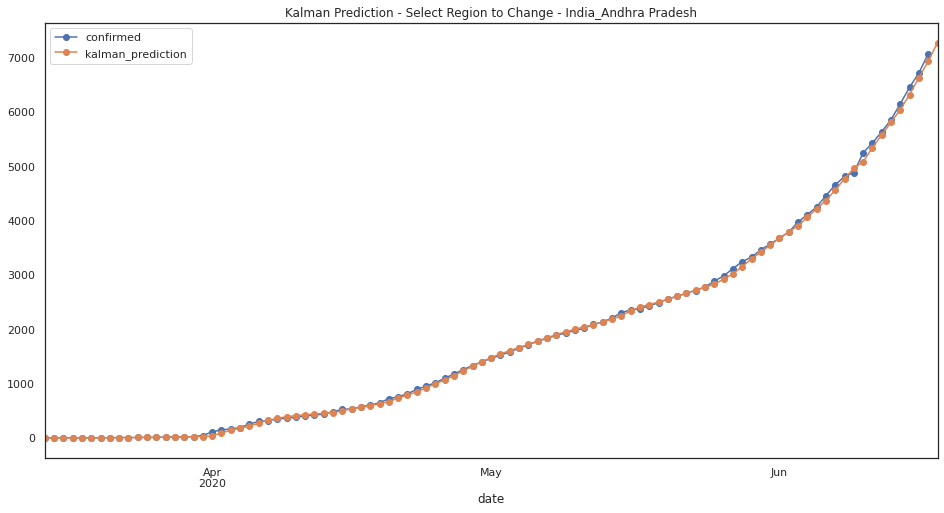

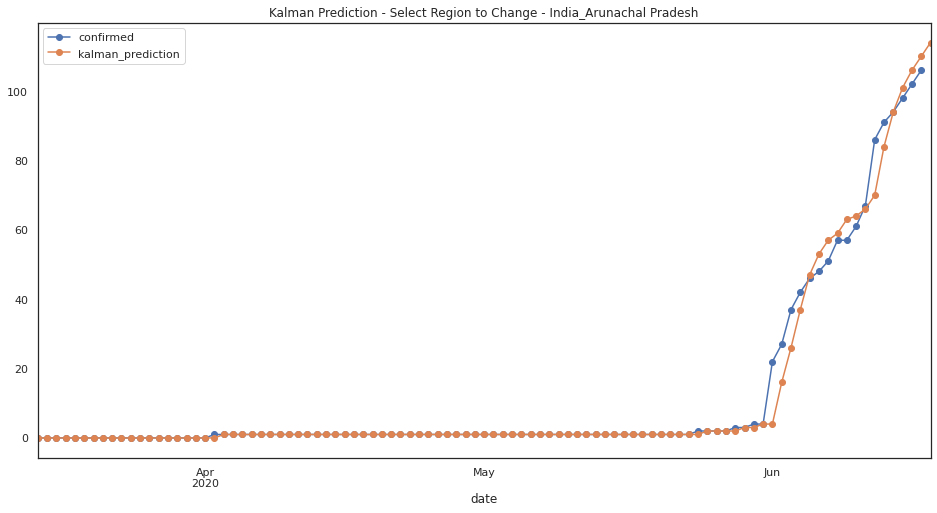

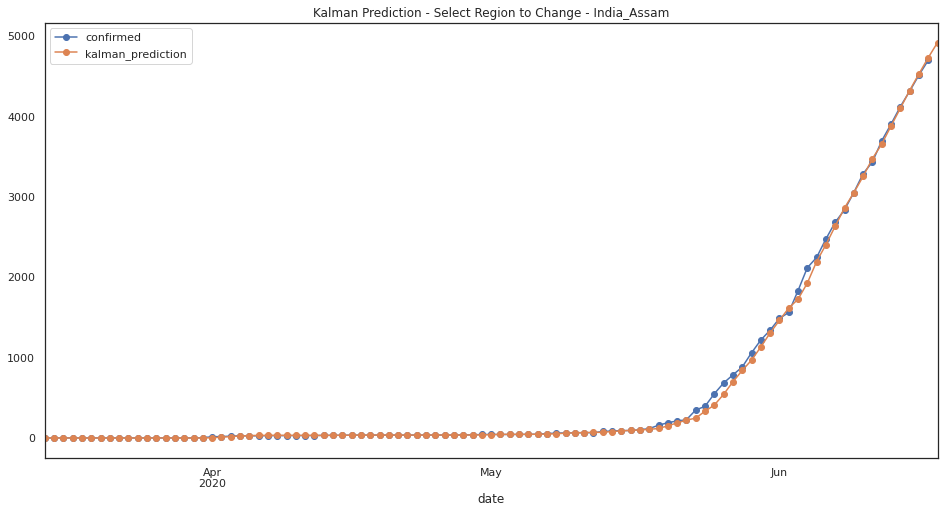

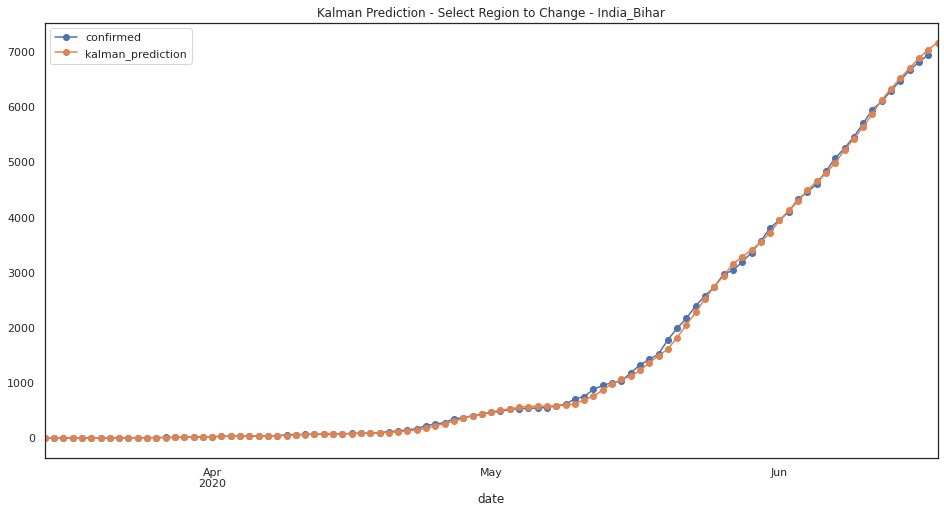

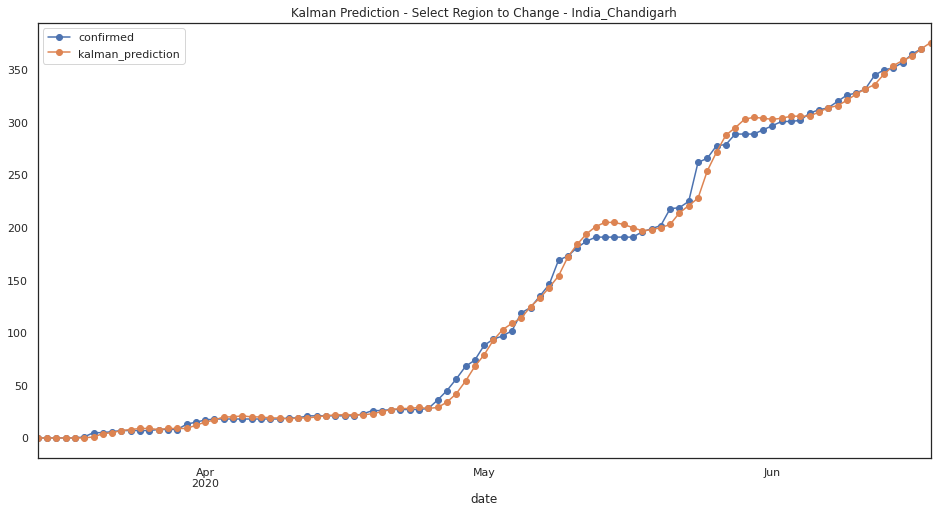

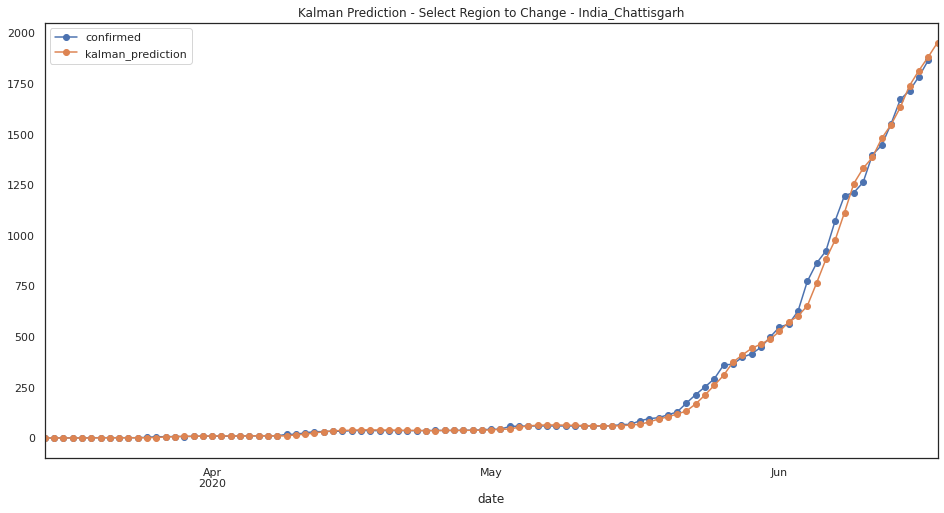

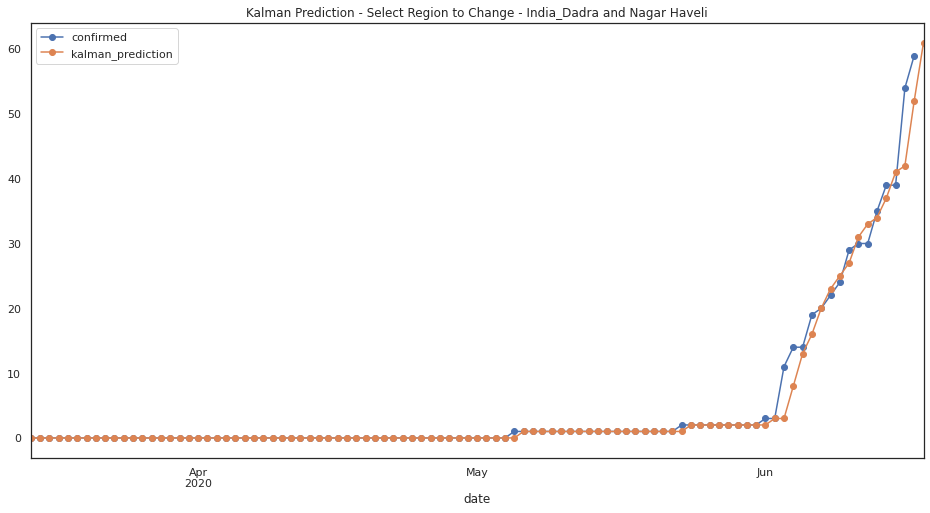

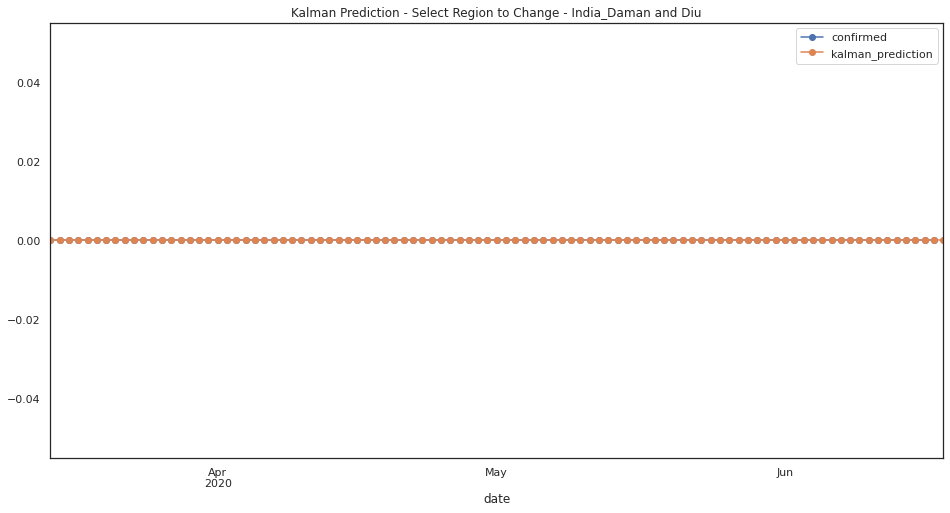

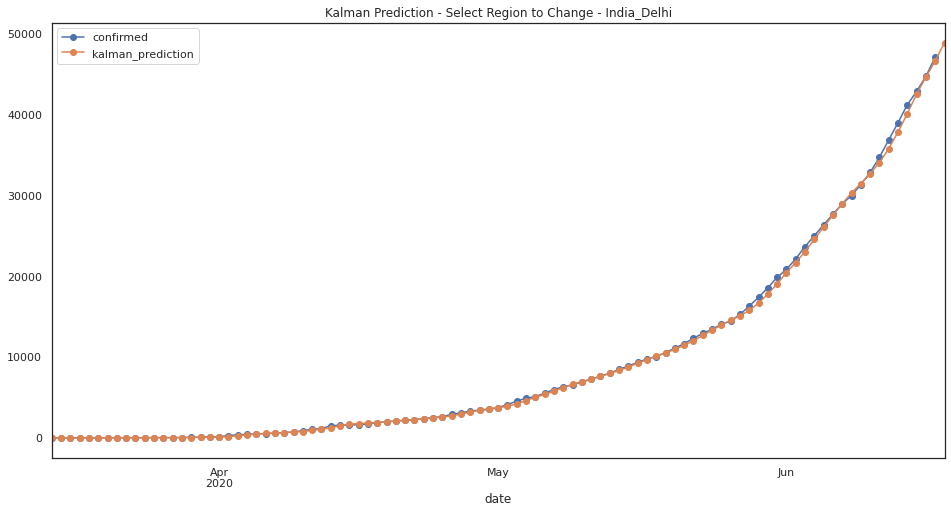

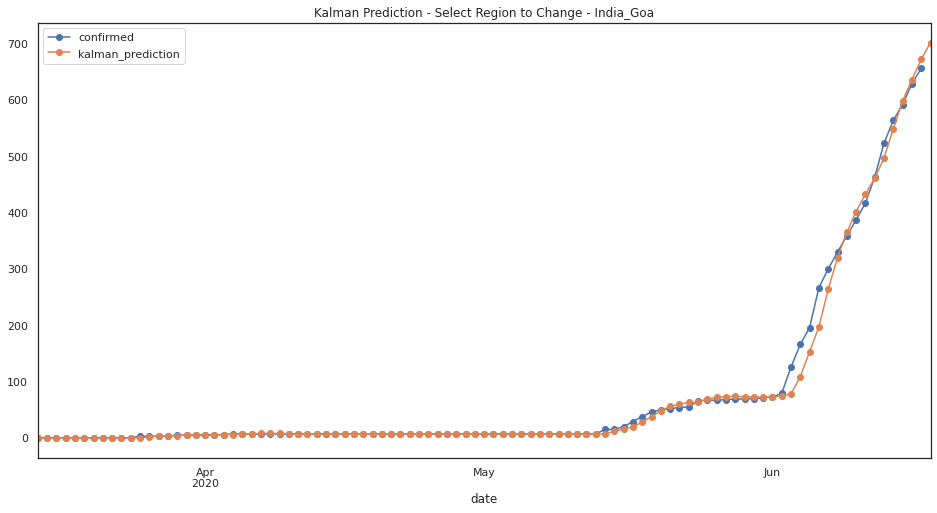

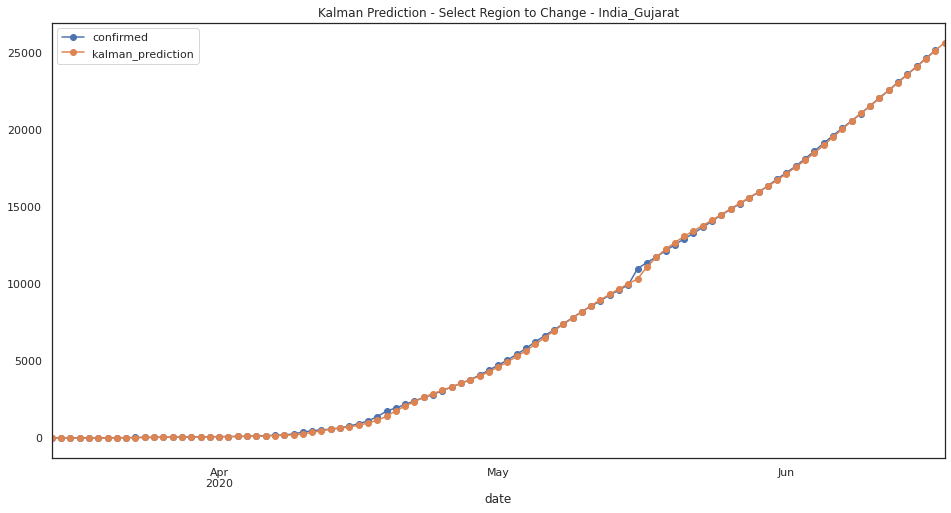

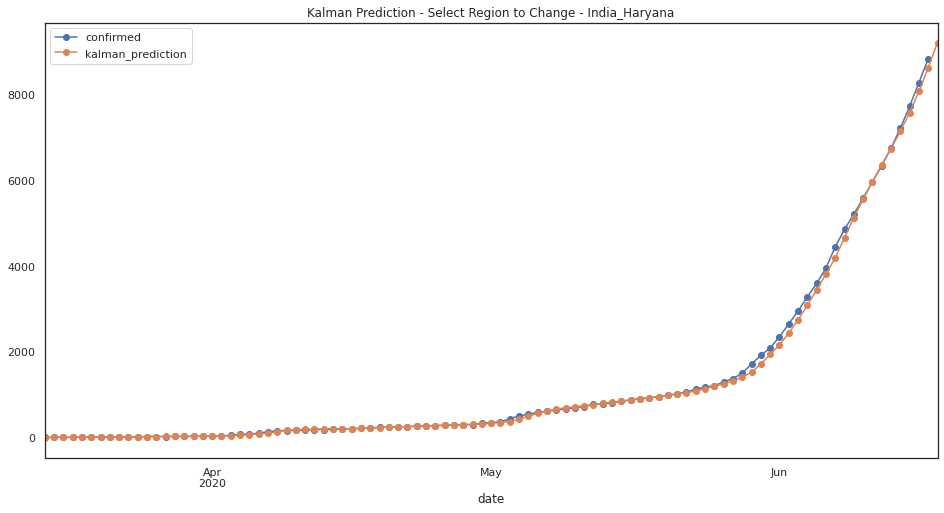

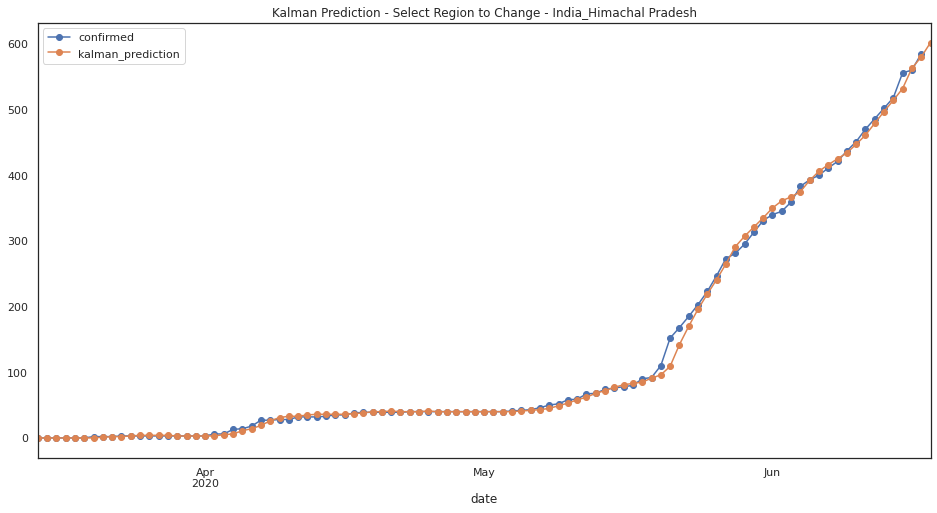

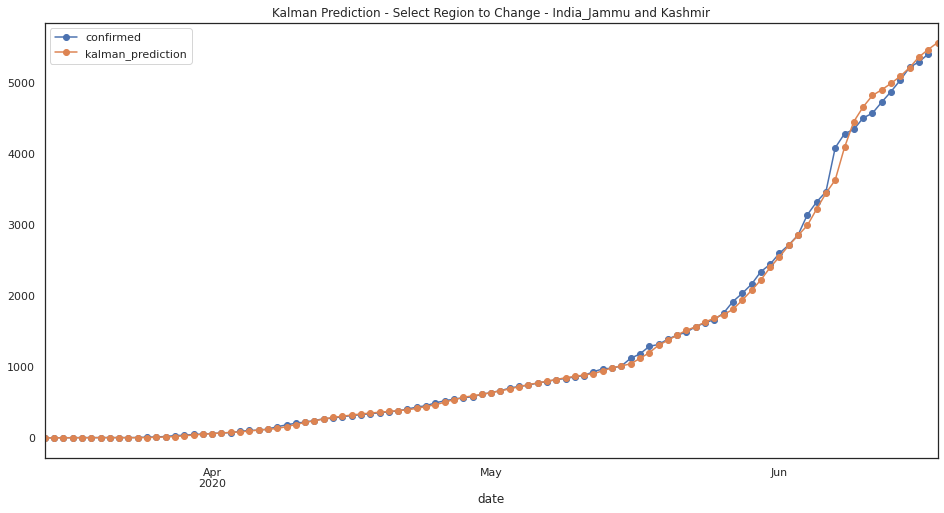

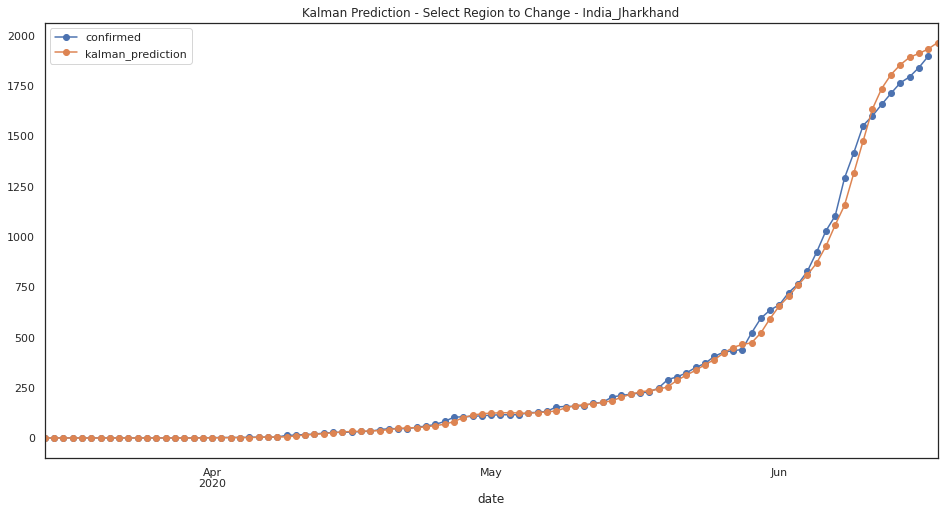

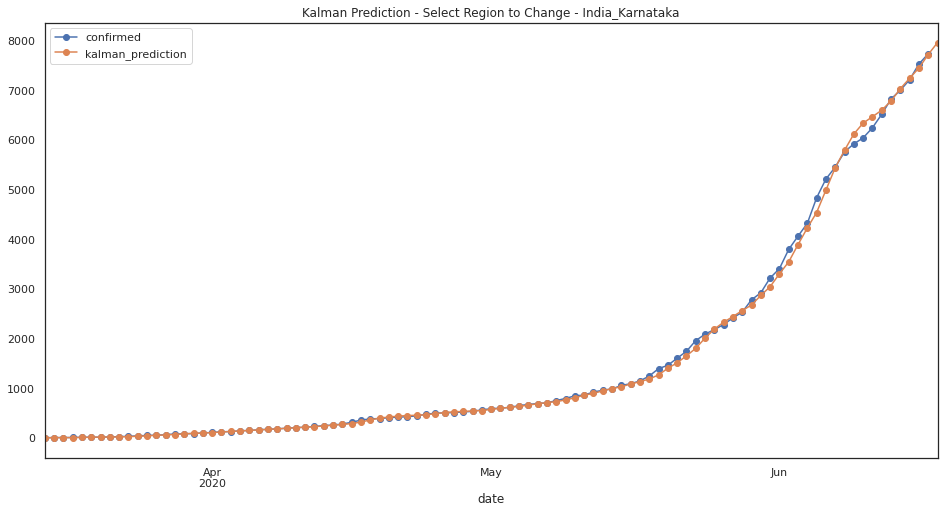

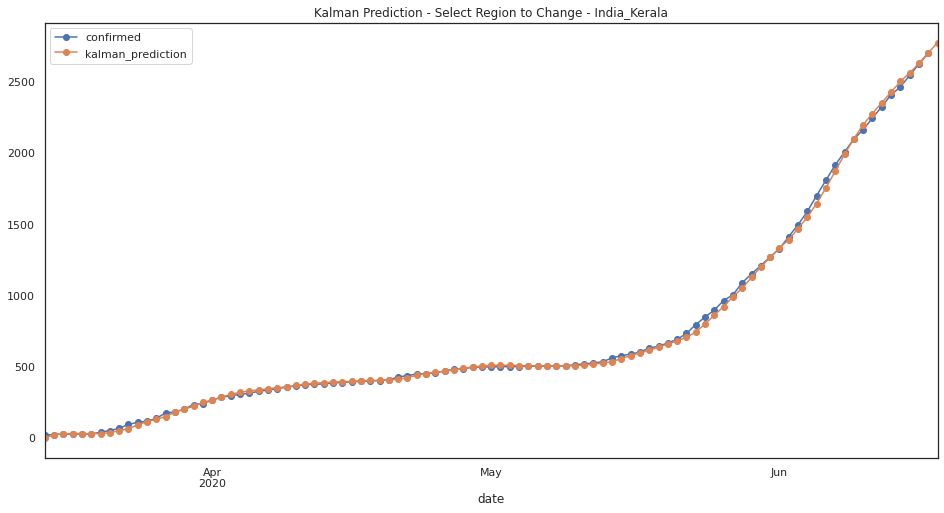

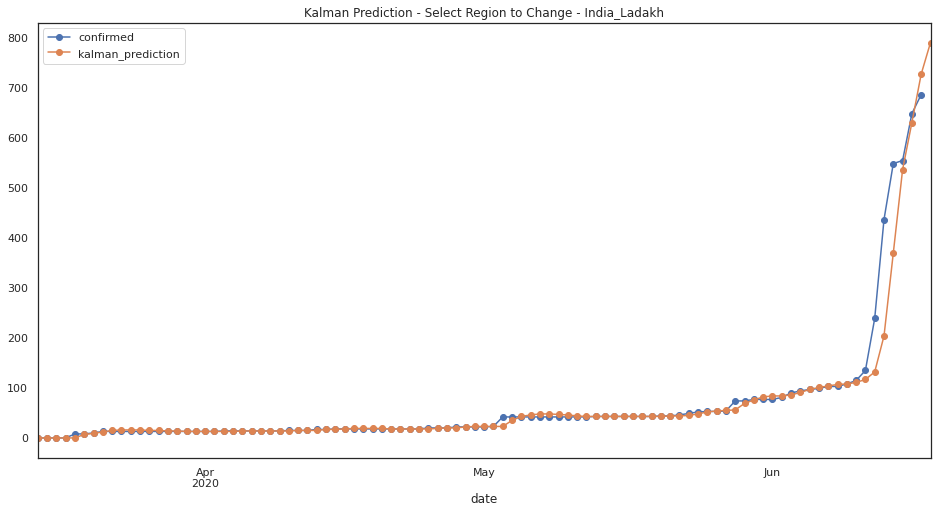

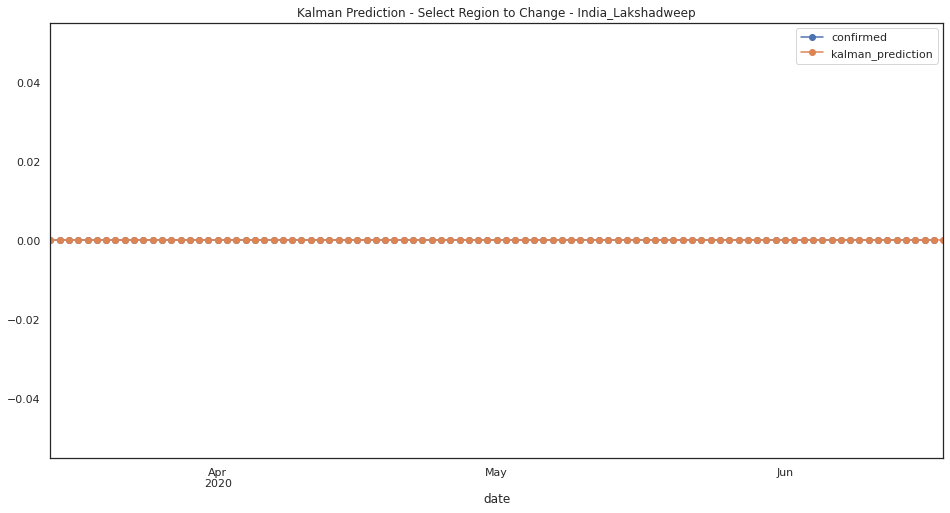

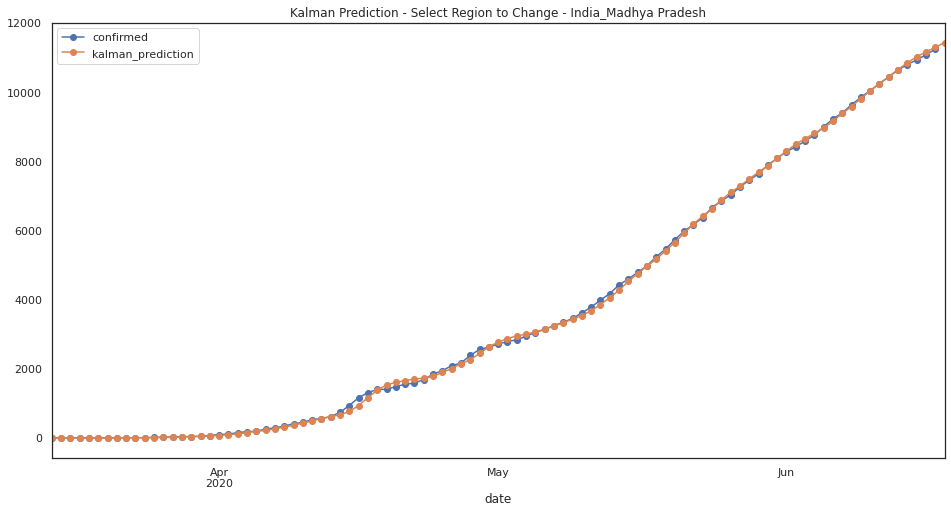

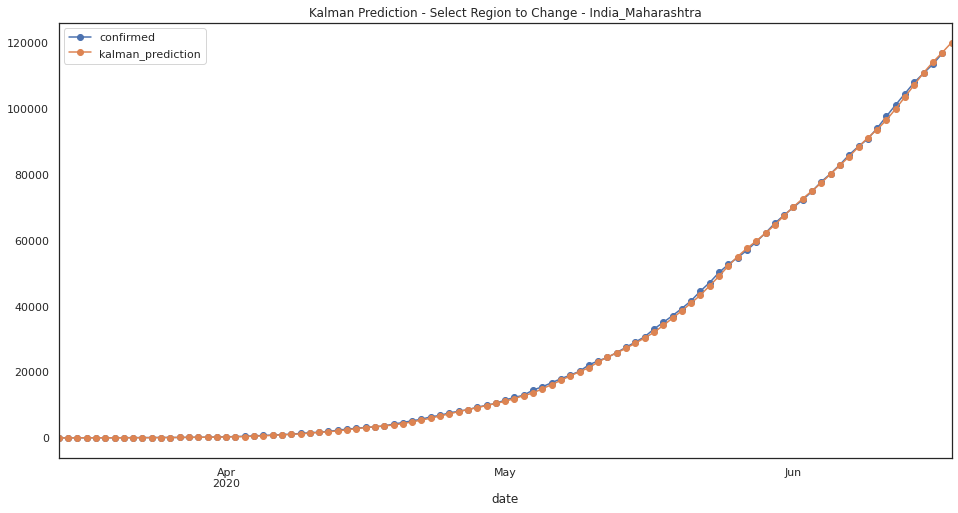

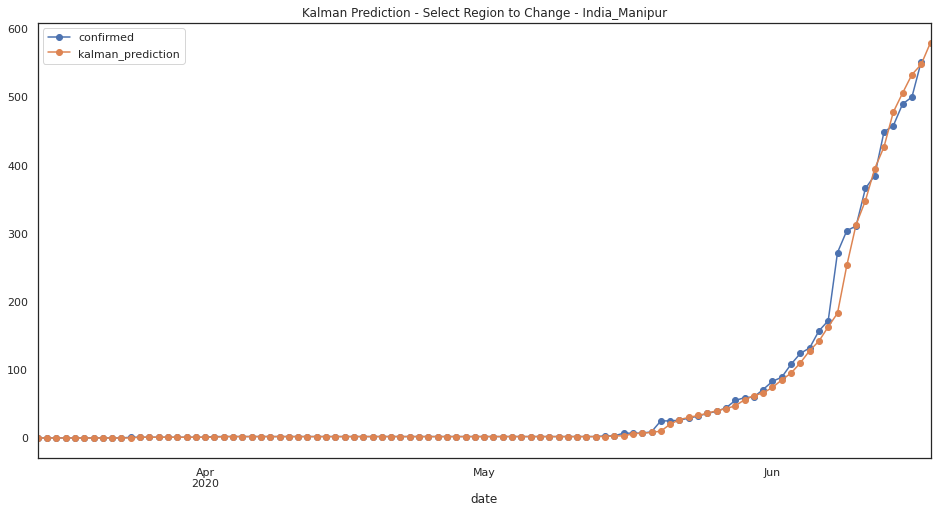

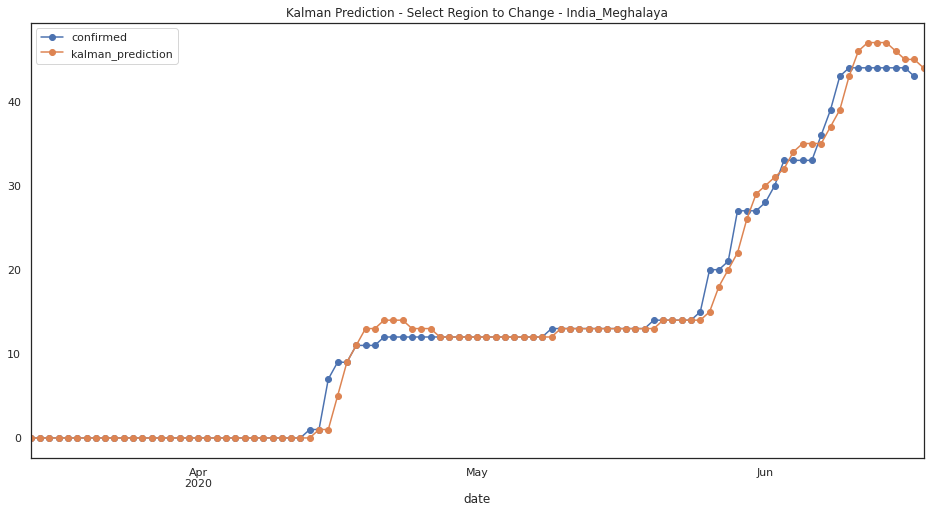

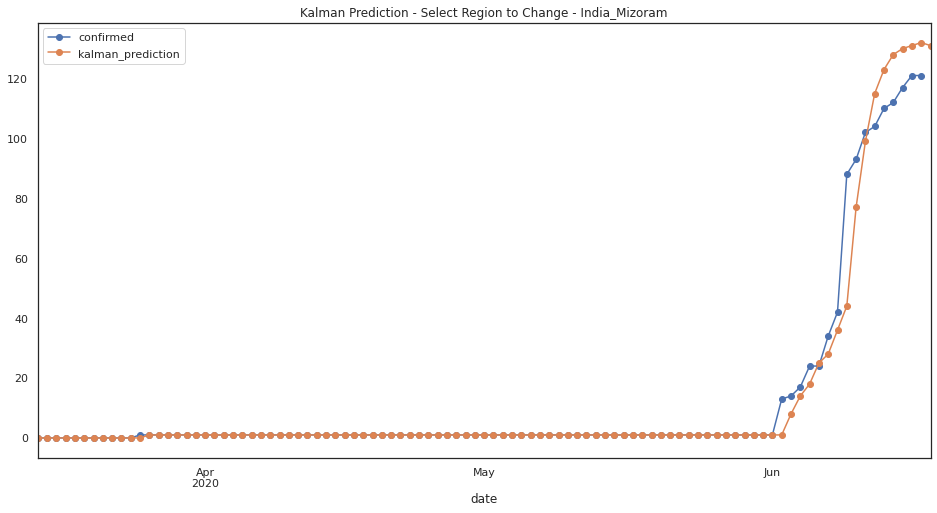

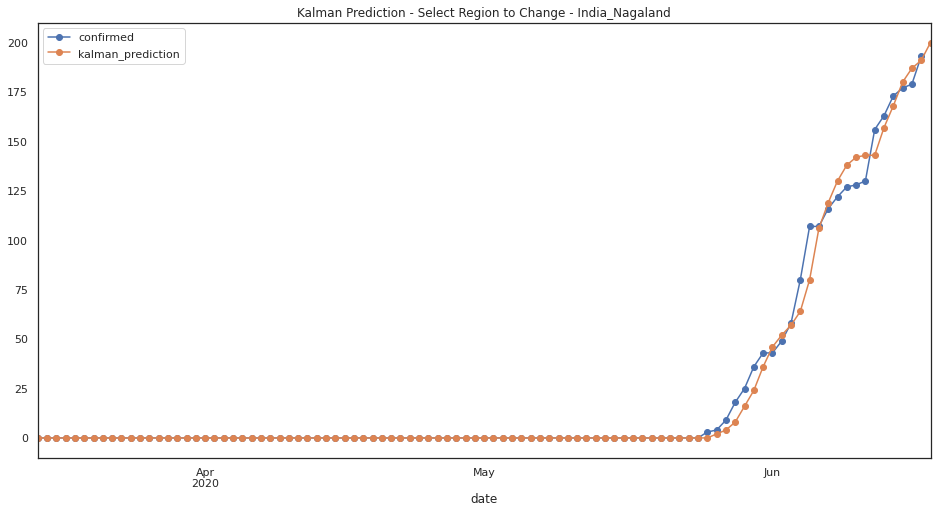

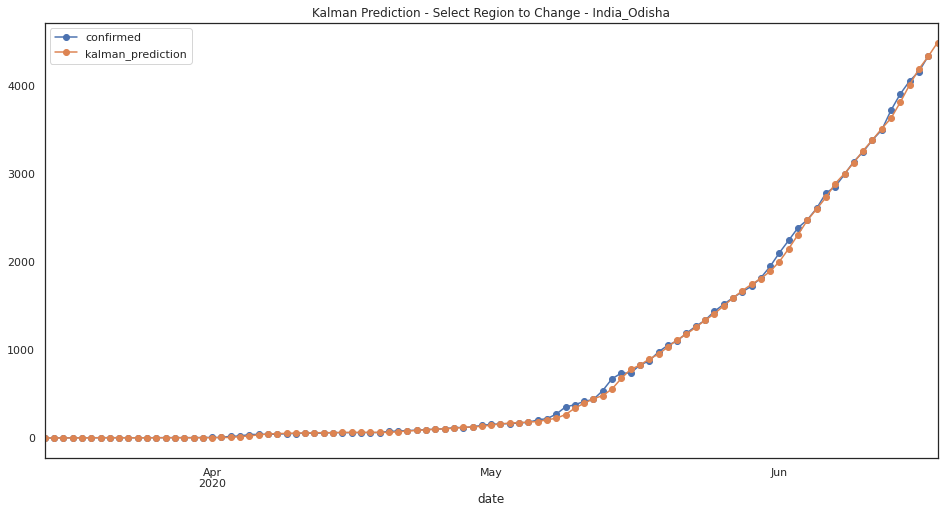

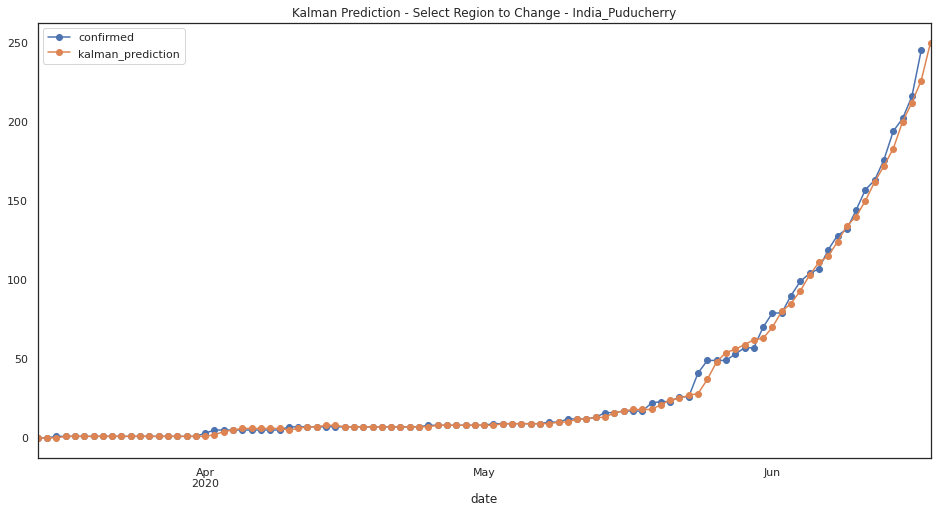

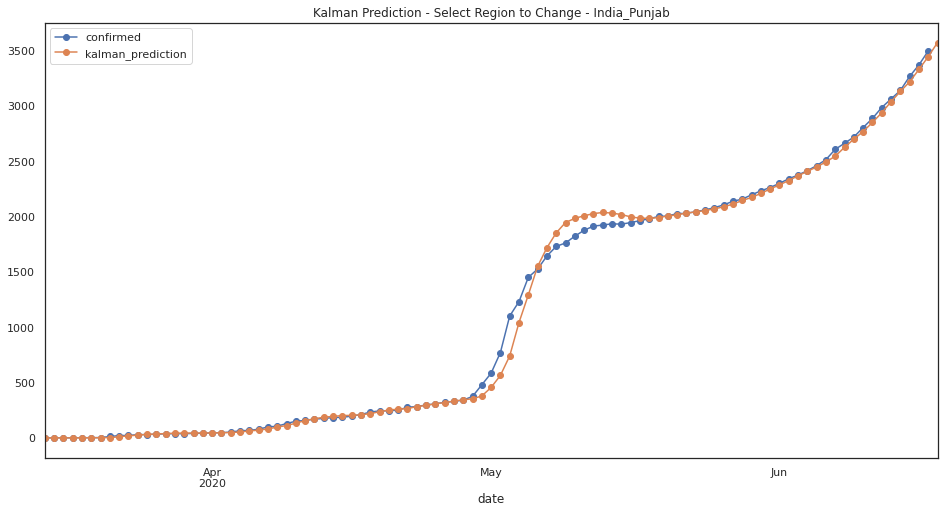

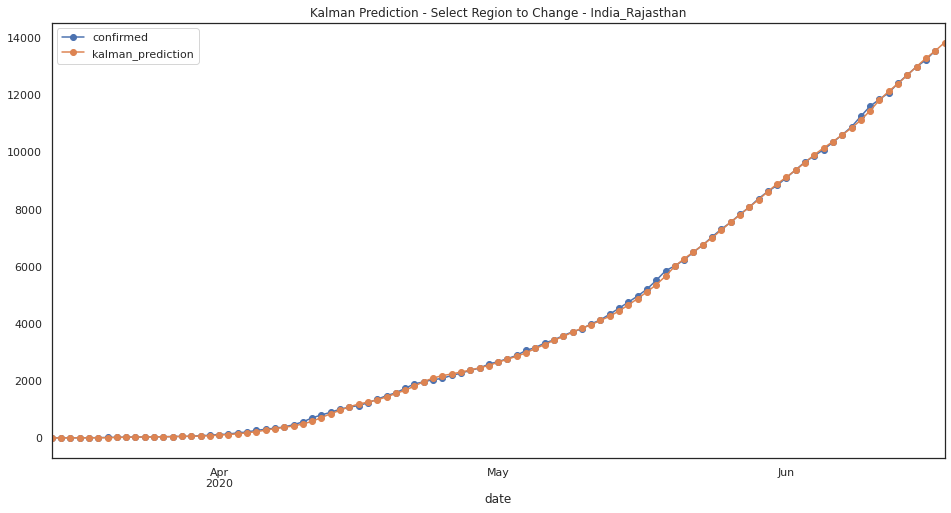

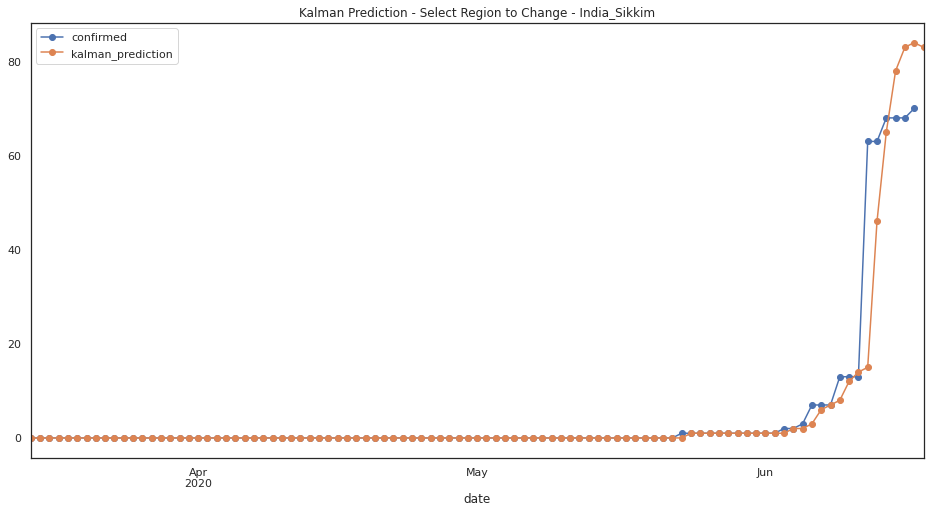

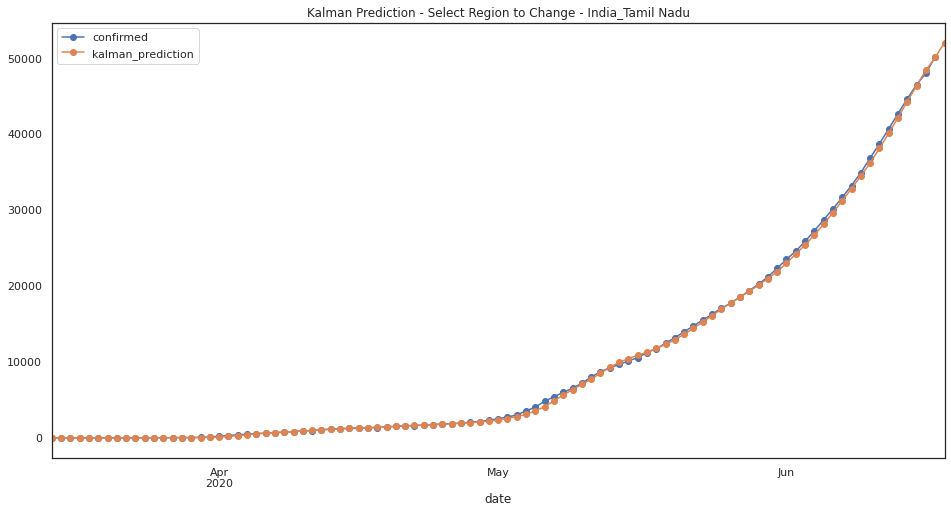

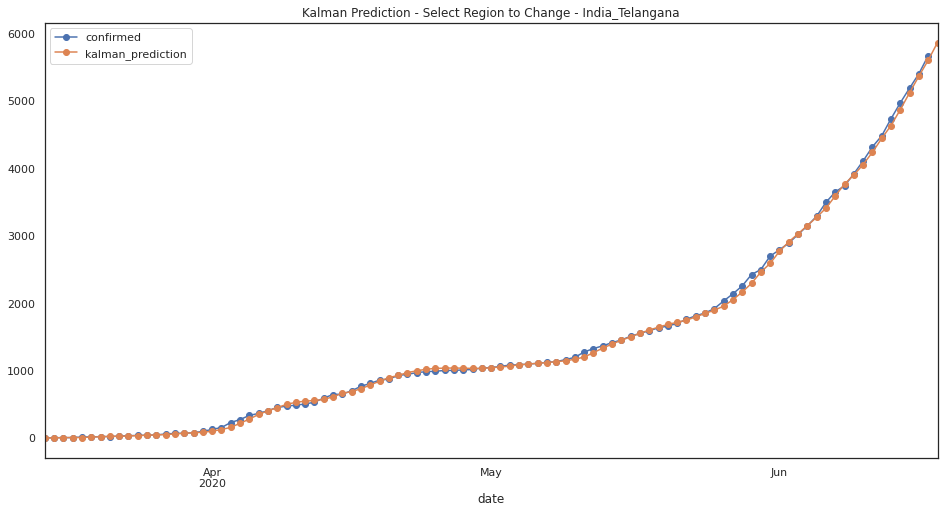

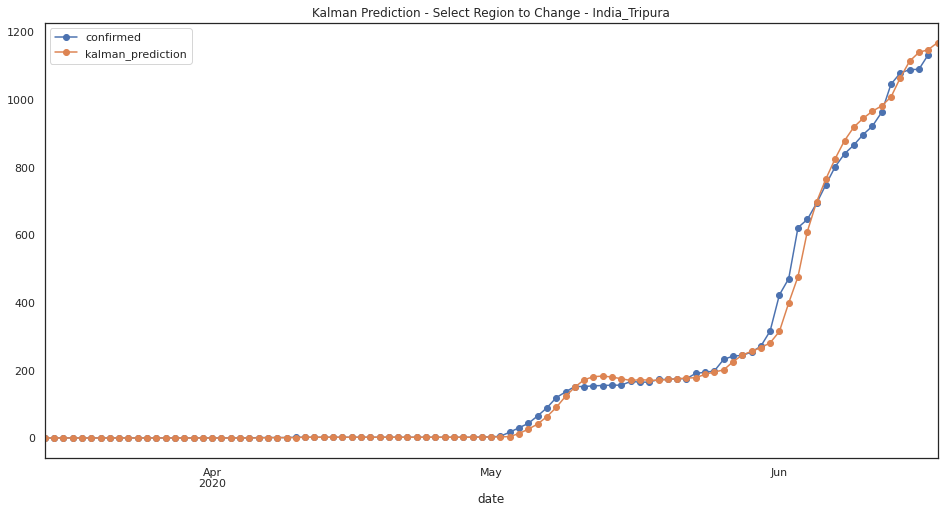

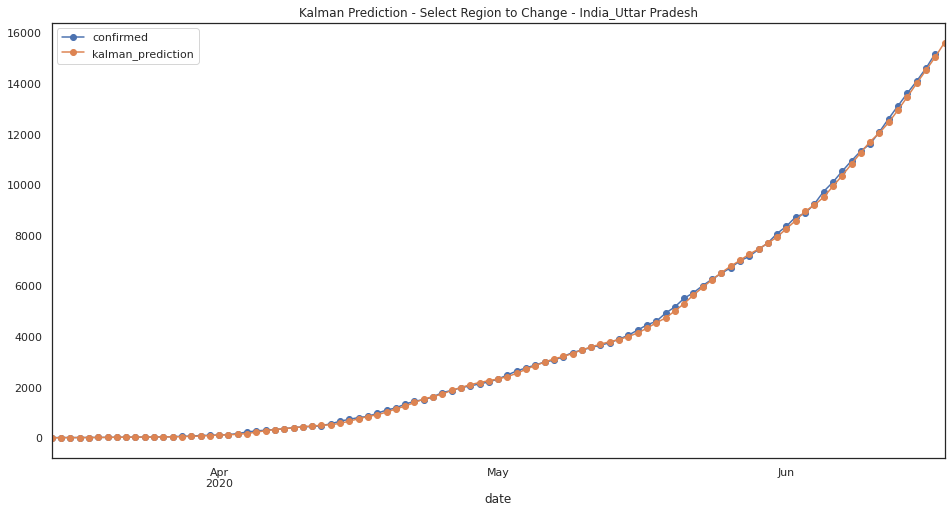

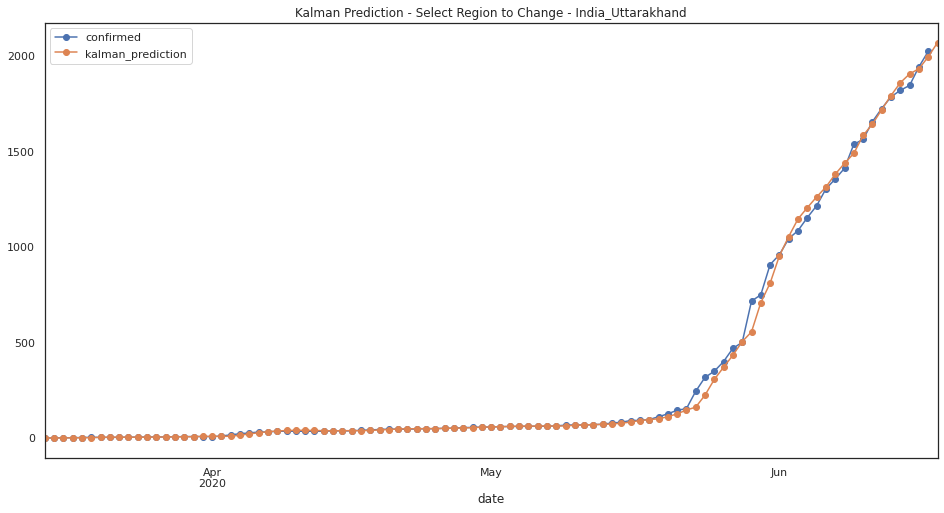

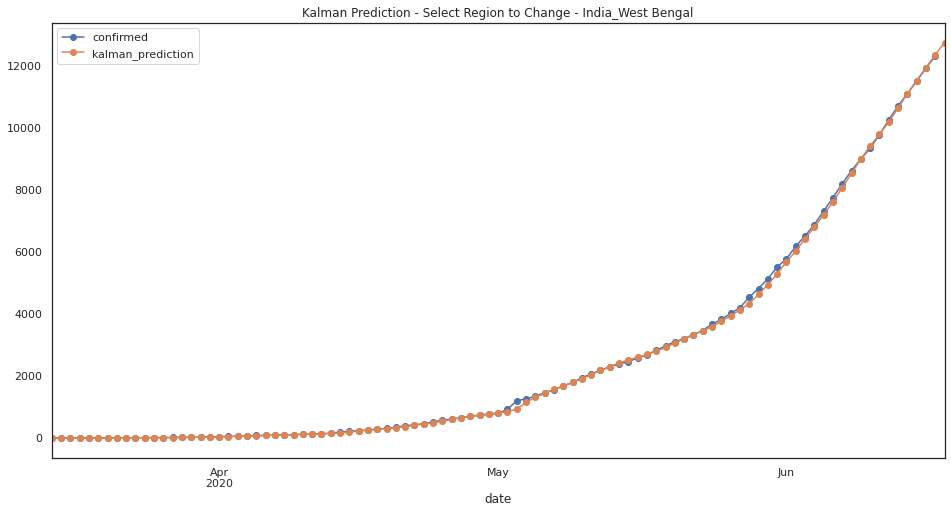

In [41]:
import os.path

# Select region
Region=['India_Andaman and Nicobar Islands','India_Andhra Pradesh','India_Arunachal Pradesh','India_Assam','India_Bihar','India_Chandigarh','India_Chattisgarh','India_Dadra and Nagar Haveli','India_Daman and Diu','India_Delhi','India_Goa','India_Gujarat','India_Haryana','India_Himachal Pradesh','India_Jammu and Kashmir','India_Jharkhand','India_Karnataka','India_Kerala','India_Ladakh','India_Lakshadweep','India_Madhya Pradesh','India_Maharashtra','India_Manipur','India_Meghalaya','India_Mizoram','India_Nagaland','India_Odisha','India_Puducherry','India_Punjab','India_Rajasthan','India_Sikkim','India_Tamil Nadu','India_Telangana','India_Tripura','India_Uttar Pradesh','India_Uttarakhand','India_West Bengal']

for reg in Region:
        # print(reg)
        region=reg

        evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
        place=0
        for i in range(1,len(t)):
          if(t.iloc[i,1] is not t.iloc[i-1,1]):
            ex=np.array(t.iloc[i-len(ts):i,10])
            pred=np.array(t.iloc[i-len(ts):i,2])
            evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
        p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
        # p=p.rename(columns = {'confirmed':'recoverd'})
        p.iloc[len(p)-1,2]=None
        p=p.set_index(['date'])
        p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0])).figure.savefig('img7.png')
        # print(evaluation[evaluation['region']==p.iloc[0,0]])
        # print(evaluation)
        p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
        if(os.path.isfile('1day.csv')):
            with open('1day.csv', 'a') as f:
                p.tail(1).to_csv(f, header=False)
        else:
            p.tail(1).to_csv('1day.csv', index=True)
        

## Correlation Matrix And Temperature

Correlation Matrix


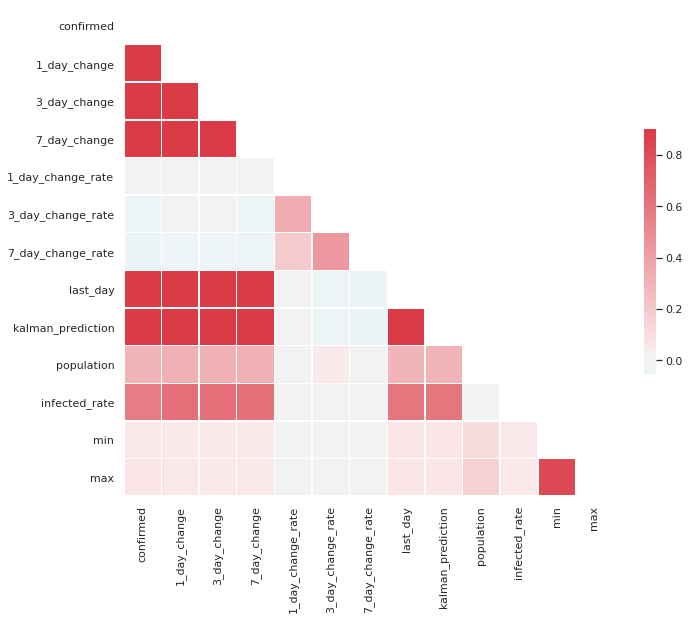

In [43]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).figure.savefig('img8.png')
print ('Correlation Matrix')

In [44]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.922387
3_day_change         0.940646
7_day_change         0.943516
1_day_change_rate   -0.026957
3_day_change_rate   -0.043371
7_day_change_rate   -0.051310
last_day             0.959764
kalman_prediction    0.960009
population           0.298460
infected_rate        0.573840
min                  0.056222
max                  0.062602
Name: confirmed, dtype: float64


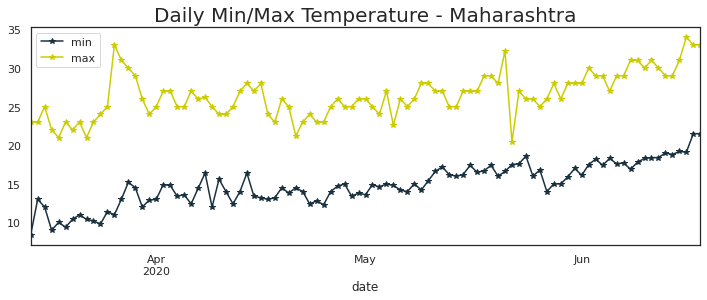

In [45]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='India_Maharashtra']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Maharashtra',fontdict={'fontsize': 20}).figure.savefig('img9.png')

In [46]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:10,1:])

Most infected Areas Avg Temperature
                            min        max
region                                    
India_Maharashtra     14.871134  26.470103
India_Tamil Nadu      23.385567  36.727835
India_Delhi           21.977320  37.016495
India_Gujarat         26.387629  39.601031
India_Rajasthan       25.302062  37.342268
India_Uttar Pradesh   23.330928  35.791753
India_Madhya Pradesh  23.732990  36.813402
India_West Bengal     24.351546  34.160825
India_Andhra Pradesh  21.278351  35.153608
India_Karnataka       22.695876  35.511340


## Kalman X Days Ahead Prediction

In [47]:
%%R
install.packages('reshape', repos='http://cran.us.r-project.org')

In [48]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("https://raw.githubusercontent.com/raghav7203/covid19-raw-data/master/17juneCSVs/ts_C17.csv?token=ALQ7JJXQX6CUNAMUFM62LMC66XAGA")
all$X1<-NULL
for (i in 1:100) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

In [49]:
all_new=%R all_new

In [50]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

,India_Andaman and Nicobar Islands,India_Andhra Pradesh,India_Arunachal Pradesh,India_Assam,India_Bihar,India_Chandigarh,India_Chattisgarh,India_Dadra and Nagar Haveli,India_Daman and Diu,India_Delhi,...,India_Puducherry,India_Punjab,India_Rajasthan,India_Sikkim,India_Tamil Nadu,India_Telangana,India_Tripura,India_Uttar Pradesh,India_Uttarakhand,India_West Bengal
date,,,,,,,,,,,,,,,,,,,,,
2020-06-18,46.0,7160.0,106.0,4813.0,7352.0,380.0,1977.0,60.0,0.0,51119.0,...,245.0,3699.0,13578.0,78.0,50392.0,6102.0,1148.0,15181.0,2023.0,12300.0
2020-06-19,46.0,7160.0,115.0,5131.0,7352.0,380.0,1977.0,67.0,0.0,54199.0,...,253.0,3699.0,13578.0,86.0,55364.0,6108.0,1184.0,15181.0,2176.0,13135.0
2020-06-20,49.0,7863.0,116.0,5180.0,7837.0,385.0,2079.0,67.0,0.0,57442.0,...,274.0,3955.0,13852.0,95.0,58077.0,6244.0,1184.0,16126.0,2261.0,13617.0
2020-06-21,49.0,8139.0,116.0,5693.0,7837.0,396.0,2208.0,67.0,0.0,60840.0,...,274.0,3955.0,13852.0,102.0,58077.0,6824.0,1184.0,16126.0,2261.0,13617.0
2020-06-22,49.0,8567.0,117.0,5693.0,7837.0,396.0,2208.0,68.0,0.0,63789.0,...,292.0,3955.0,13852.0,102.0,61954.0,7185.0,1218.0,16126.0,2261.0,14654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,184.0,35877.0,587.0,16145.0,21151.0,1025.0,7435.0,370.0,0.0,295477.0,...,783.0,11777.0,40095.0,477.0,159998.0,15276.0,3909.0,49675.0,13643.0,31228.0
2020-09-22,184.0,35877.0,587.0,16145.0,22325.0,1034.0,7435.0,381.0,0.0,295477.0,...,810.0,11777.0,40095.0,486.0,159998.0,15276.0,3909.0,49675.0,13957.0,31981.0
2020-09-23,184.0,36381.0,613.0,16254.0,22325.0,1034.0,7435.0,381.0,0.0,314684.0,...,848.0,11801.0,40095.0,486.0,165754.0,15702.0,3909.0,49675.0,13957.0,31981.0


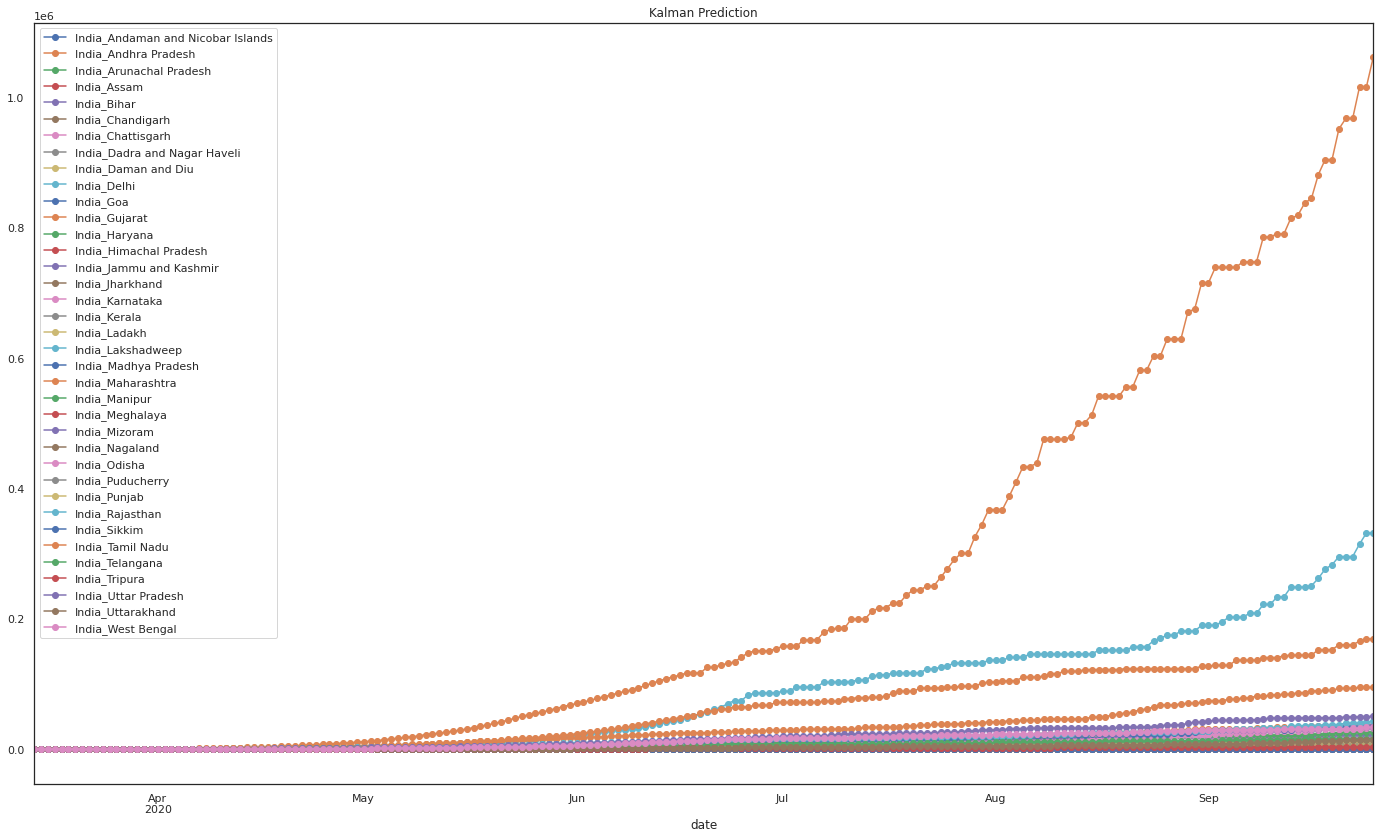

In [52]:
# Select region
region=['date','India_Andaman and Nicobar Islands','India_Andhra Pradesh','India_Arunachal Pradesh','India_Assam','India_Bihar','India_Chandigarh','India_Chattisgarh','India_Dadra and Nagar Haveli','India_Daman and Diu','India_Delhi','India_Goa','India_Gujarat','India_Haryana','India_Himachal Pradesh','India_Jammu and Kashmir','India_Jharkhand','India_Karnataka','India_Kerala','India_Ladakh','India_Lakshadweep','India_Madhya Pradesh','India_Maharashtra','India_Manipur','India_Meghalaya','India_Mizoram','India_Nagaland','India_Odisha','India_Puducherry','India_Punjab','India_Rajasthan','India_Sikkim','India_Tamil Nadu','India_Telangana','India_Tripura','India_Uttar Pradesh','India_Uttarakhand','India_West Bengal']
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction').figure.savefig('img10.png')

# p_kalman2=all_new[['date','India_Maharashtra']]
# p_kalman2=p_kalman2.set_index(['date'])
# p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p_kalman2.columns[0])).figure.savefig('img11.png')

prediction_one_month = p_kalman.tail(100)
prediction_two_weeks = prediction_one_month.tail(100)
# prediction_two_weeks
prediction_two_weeks.to_csv('100days2.csv', index=True)


## Prediction Heatmap

In [53]:
pip install gmplot

     |████████████████████████████████| 115 kB 2.7 MB/s eta 0:00:01
  Created wheel for gmplot: filename=gmplot-1.2.0-py3-none-any.whl size=143762 sha256=b2d7a373dee78ce2cd3d0ff46fb16cce3ac6b6573478b1698d03ff95f8cebda1
  Stored in directory: /root/.cache/pip/wheels/a1/bb/61/143790d9935e333669dd6aeef38f7aec9b3a1b7007f47d6fe8
Successfully built gmplot
Note: you may need to restart the kernel to use updated packages.


In [54]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [55]:
heatmap=confirmed[['region','Lat','Long']]
hold=confirmed[['region']]
# print(hold)
temp=pred.T
p_m=pd.DataFrame(temp)
p_m=p_m.reset_index()
hold['tmp']=1
p_m['tmp']=1
p_m=pd.merge(hold,p_m,on=['tmp'])
p_m=p_m.drop('tmp',axis=1)
# print(p_m)
heatmap_m=heatmap.merge(p_m,how='left',on='region')
# print(heatmap_m)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [56]:
heatmap_m.columns.values[0] #9/30/61

'region'

In [57]:
heatmap=pd.DataFrame()
for i in range(0,len(heatmap_m)):
  if heatmap_m.iloc[i,3].astype(int)==0: # heatmap_m.iloc[i,9] columns is the date we want to check
    continue
  #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),:]]*abs(heatmap_m.iloc[i,30].astype(int)), ignore_index=True,sort=False))
  heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,3].astype(int)), ignore_index=True,sort=False))

In [58]:
latitudes = heatmap['Lat']
longitudes = heatmap['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(30.97564, 112.2707, 5)
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("Heatmap4-2020-04-23.html")
# print("raghav")
# import os
# os.system('Heatmap4-2020-04-24.html')